# Project Part A: Exploratory Data Analysis

![](banner_project.jpg)

In [1]:
analyst = "Priscila Carcamo Amorim" # Replace this with your name

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
options(repr.matrix.max.cols=200)
update_geom_defaults("point", list(size=1))                                

.................................................... start of document ....................................................

## Directions

### Objective

Conduct an exploratory data analysis of a dataset about public company fundamentals.  Later, use the insights gleaned along with additional analysis to recommend a portfolio of 12 company investments that maximizes 12-month return of an overall \$1,000,000 investment.

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.

Transform the dataset representation to capture all information about any single company in a single observation.

Apply various descriptive statistics, data visualizations (including kernel density estimates), and cross-tabulations to look for interesting patterns and inter-company relationships.

### Data Source

The data includes these files:

* Data Dictionary.csv
* Company Fundamentals 2017.csv
* Company Fundamentals 2018.csv

The dataset and accompanying data dictionary was sourced from ...

* Wharton Research Data Services > Compustat - Capital IQ from Standard & Poor's > North America - Daily > Fundamentals Quarterly (https://wrds-www.wharton.upenn.edu/)

  * Date Variable: Data Date
  * Date Range: 2017-01 to 2017-12 -or- 2018-01 to 2018-12
  * Company Codes: Search the entire database
    * Consolidtaion Level: C, Output
    * Industry Format: INDL, FS, Output
    * Data Format: STD, Output
    * Population Source: D, Output
    * Quarter Type: Fiscal View, Output
    * Currency: USD, Output (not CAD)
    * Company Status: Active, Output (not Inactive)
  * Variable Types: Data Items, Select All (674)
  * Query output:
    * Output format: comma-delimited text
    * Compression type: None
    * Data format: MMDDYY10

The dataset is restricted to select US active, publicly held companies that reported quarterly measures including stock prices for 1st, 2nd, 3rd, and 4th quarters in years 2017 and 2018.  All non-missing stock prices exceed $3 per share.  File formats are all comma-separated values (CSV).

The data dictionary is from Variable Descriptions tab, copied to Excel, saved in csv format.

_**For this project, do not source any data from year 2019.**_

## Data

_<< Discuss this data retrieval. >>_  
  
**ANSWER**:  
  
The first thing I notice is that this data has a lot of information; the raw dataset has a total of 680 variables, which is very hard to keep track of. The data dictionary has less variables accounted for; in the raw data set, there are 6 more variables than the data dictionary. There are also many observations (33269), thus making it hard to look at everything at once. There are 8496 unique companies, so each company has more than one observation, which makes sense since the data contain quarterly measures. With the partitioning of the data for 2017 into quarters, there is an increase in the number of observations per quarter. For instance, for the quarter 1 partition, there are 4324 observations, whereas the quarter 4 partition has 4434 observations. Consolidating the quarterly data significantly decreased the number of observations in our ideal data set to 4434, compared to the original 33269 observations in the 2017 data set. For the next year data (2018), the original data set size also significantly decreased from 35728 observations to 5968 observations after filtering and consolidating the data as we did for the 2017 data set. Furthermore, the 2018 data set has the same number of variables as the 2017 data set. For both data sets, we are only keeping information that have a non-null prccq value and that have data on quarter 4. After merging the two consolidated data sets for 2017 and 2018, we are left with only 4305 observations and 2714 variables (columns). This happens because we are keeping only observations that have both 2017 and 2018 information, and the number of variables significantly increases because we are merging all columns from both data sets.

### Data Dictionary

Retrieve and present the data dictionary for the company fundamentals datasets.

In [3]:
# Retrieve the data dictionary.
# How many variable entries in the company fundamentals datasets?
# What are the variable names, types, and descriptions?

dictionary = read.csv("Data Dictionary.csv")
size(dictionary)
dictionary

observations,variables
674,4


Variable.Name,Data.Type,Variable.Description,Help
ACCHGQ,NUM,ACCHGQ -- Accounting Changes - Cumulative Effect,NA
ACCHGY,NUM,ACCHGY -- Accounting Changes - Cumulative Effect,NA
ACCTCHGQ,CHAR,ACCTCHGQ -- Adoption of Accounting Changes,NA
ACCTSTDQ,CHAR,ACCTSTDQ -- Accounting Standard,NA
ACOMINCQ,NUM,ACOMINCQ -- Accumulated Other Comprehensive Income (Loss),NA
ACOQ,NUM,ACOQ -- Current Assets - Other - Total,NA
ACTQ,NUM,ACTQ -- Current Assets - Total,NA
ADD1,CHAR,ADD1 -- Address Line 1,NA
ADD2,CHAR,ADD2 -- Address Line 2,NA
ADD3,CHAR,ADD3 -- Address Line 3,NA


### Data for Current Year

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2017.

In [4]:
# Retrieve the 2017 data.
# How many observations and variables?
# What are the variable names?

datax = read.csv("Company Fundamentals 2017.csv", header=TRUE)
size(datax)
datax[1:3,]

observations,variables
33269,680


gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchgq,acctstdq,adrrq,ajexq,ajpq,bsprq,compstq,curcdq,curncdq,currtrq,curuscnq,datacqtr,datafqtr,finalq,ogmq,rp,scfq,srcq,staltq,updq,apdedateq,fdateq,pdateq,rdq,acchgq,acomincq,acoq,actq,altoq,ancq,anoq,aociderglq,aociotherq,aocipenq,aocisecglq,aol2q,aoq,apq,aqaq,aqdq,aqepsq,aqpl1q,aqpq,arcedq,arceepsq,arceq,atq,aul3q,billexceq,capr1q,capr2q,capr3q,capsftq,capsq,ceiexbillq,ceqq,cheq,chq,cibegniq,cicurrq,ciderglq,cimiiq,ciotherq,cipenq,ciq,cisecglq,citotalq,cogsq,csh12q,cshfd12,cshfdq,cshiq,cshopq,cshoq,cshprq,cstkcvq,cstkeq,cstkq,dcomq,dd1q,deracq,deraltq,derhedglq,derlcq,derlltq,diladq,dilavq,dlcq,⋯,srety,sstky,stkcoy,stkcpay,tdcy,tfvcey,tiey,tiiy,tsafcy,txachy,txbcofy,txbcoy,txdcy,txdiy,txpdy,txty,txwy,uaolochy,udfccy,udvpy,ufretsdy,ugiy,uniamiy,unopincy,unwccy,uoisy,updvpy,uptacy,uspiy,ustdncy,usubdvpy,utfdocy,utfoscy,utmey,uwkcapcy,wcapchy,wcapcy,wday,wddy,wdepsy,wdpy,xidocy,xidoy,xinty,xiy,xopry,xoptdqpy,xoptdy,xoptepsqpy,xoptepsy,xoptqpy,xopty,xrdy,xsgay,exchg,cik,costat,fic,cshtrq,dvpspq,dvpsxq,mkvaltq,prccq,prchq,prclq,adjex,add1,add2,add3,add4,addzip,busdesc,city,conml,county,dlrsn,ein,fax,fyrc,ggroup,gind,gsector,gsubind,idbflag,incorp,loc,naics,phone,prican,prirow,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
1004,02/28/2017,2016,3,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.4,28.0,893.1,90.5,609.0,NA,0,0,-42.5,0,NA,248.5,194.6,NA,NA,NA,NA,NA,NA,NA,NA,1502.1,NA,NA,NA,NA,NA,NA,457.3,NA,885.7,10.1,10.1,13.7,-0.2,0,0,0,0.3,13.8,0,13.8,340.7,33.925,34.275,34.2,45.170,0.052,34.324,33.7,1,-0.1,45.2,0,2,NA,NA,NA,NA,NA,0,14.3,2,⋯,NA,5.3,7.6,NA,NA,NA,NA,NA,NA,NA,0,0,-1.7,NA,7.1,19.5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.6,-0.4,3.8,0,1084.0,NA,NA,NA,NA,NA,NA,NA,126.6,11,1750,A,USA,11911652,0.075,0.075,1181.432,34.42,38.70,31.20,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988
1004,05/31/2017,2016,4,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q2,2016Q4,Y,,Q,7,5,,3,05/31/2017,07/14/2017,07/12/2017,07/11/2017,0,-39.9,25.7,888.5,76.5,615.6,NA,0,0,-38.2,0,NA,254.1,177.4,NA,NA,NA,NA,NA,NA,NA,NA,1504.1,NA,NA,NA,NA,NA,NA,460.8,NA,914.2,10.3,10.3,21.2,2.2,0,0,0,4.3,27.7,0,27.7,372.6,33.900,34.300,34.3,45.175,0.096,34.354,33.8,1,-0.2,45.2,0,2,NA,NA,NA,NA,NA,0,16.1,2,⋯,NA,0.0,11.0,NA,NA,NA,NA,NA,NA,NA,0,0,0.6,12.5,NA,25.1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-2.4,4.5,5.3,0,1511.1,NA,NA,NA,NA,NA,NA,NA,181.1,11,1750,A,USA,10061897,0.075,0.075,1200.329,34.94,36.47,31.97,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988
1004,08/31/2017,2017,1,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q3,2017Q1,Y,,Q,7,5,,3,08/31/2017,09/21/2017,09/19/2017,09/19/2017,0,-39.0,33.7,904.7,114.0,627.0,NA,0,0,-37.9,0,NA,261.2,176.3,NA,NA,NA,NA,NA,NA,NA,NA,1531.7,NA,NA,NA,NA,NA,NA,460.3,NA,924.7,15.1,15.1,10.6,0.6,0,0,0,0.3,11.5,0,11.5,326.1,33.800,34.275,34.5,45.301,0.143,34.622,34.0,1,-0.1,45.3,0,2,NA,NA,NA,NA,NA,0,10.9,2,⋯,NA,6.5,2.6,NA,NA,NA,NA,NA,NA,NA,0,0,0.2,NA,1.3,4.4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N

In [5]:
# How many unique companies?

fmt(length(unique(datax$gvkey)), "unique companies in current year dataset")

unique companies in current year dataset
8496


In [6]:
# Which variables are listed in the data dictionary but not in the company fundamentals dataset (if any)?
# Which variables are listed in the company fundamentals dataset but not in the data dictionary (if any)?

layout(fmt(paste(setdiff(tolower(dictionary[,1]), colnames(datax)), collapse=" "), "more variables in data dictionary"),
       fmt(paste(setdiff(colnames(datax), tolower(dictionary[,1])), collapse=" "), "more variables in current year dataset"))

more variables in data dictionary
""
more variables in current year dataset
gvkey datadate indfmt consol popsrc datafmt curcdq costat


#### Partition Data by Calendar Quarter 

To partition the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such.  Then partition into four new datasets, one for each quarter, and drop the quarter variables. Additionally, filter the observations to include only those with non-missing `prccq` $\geq$ 3.  Then remove any observations about companies that reported more than once per quarter.  Then change all the variable names (except for the `gvkey`, `tic`, and `conm` variables) by suffixing them with quarter information - e.g., in the Quarter 1 dataset, `prccq` becomes `prccq.q1`, etc.

In [7]:
# Partition the dataset as described.

datax$quarter = quarter(mdy(datax[,2]))

data.current.q1 = datax[(datax$quarter==1) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q2 = datax[(datax$quarter==2) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q3 = datax[(datax$quarter==3) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]

data.current.q1 = data.current.q1[!duplicated(data.current.q1$gvkey),]
data.current.q2 = data.current.q2[!duplicated(data.current.q2$gvkey),]
data.current.q3 = data.current.q3[!duplicated(data.current.q3$gvkey),]
data.current.q4 = data.current.q4[!duplicated(data.current.q4$gvkey),]

colnames(data.current.q1)[-c(1, 10, 12)] = paste0(colnames(data.current.q1)[-c(1, 10, 12)], ".q1")
colnames(data.current.q2)[-c(1, 10, 12)] = paste0(colnames(data.current.q2)[-c(1, 10, 12)], ".q2")
colnames(data.current.q3)[-c(1, 10, 12)] = paste0(colnames(data.current.q3)[-c(1, 10, 12)], ".q3")
colnames(data.current.q4)[-c(1, 10, 12)] = paste0(colnames(data.current.q4)[-c(1, 10, 12)], ".q4")

In [8]:
layout(fmt(size(data.current.q1)),
       fmt(size(data.current.q2)),
       fmt(size(data.current.q3)),
       fmt(size(data.current.q4)))

observations,variables
4324,680
observations,variables
4387,680
observations,variables
4397,680
observations,variables
4434,680


#### Consolidate Data by Company

Consolidate the four quarter datasets into one dataset, with one observation per company that includes variables for all four quarters.  Remove any observations with missing `prccq.q4` values.

In [9]:
# Consolidate the partitions as described.
# How many observations and variables in the resulting dataset?
# Present the first few observations of the resulting dataset. 

m12 = merge(data.current.q1, data.current.q2, by=c("gvkey", "tic", "conm"), all=TRUE)
m34 = merge(data.current.q3, data.current.q4, by=c("gvkey", "tic", "conm"), all=TRUE)
data.current = merge(m12, m34, by=c("gvkey", "tic", "conm"), all=TRUE, sort=TRUE)

data.current = data.current[!is.na(data.current$prccq.q4),]

size(data.current)
data.current[1:3,] # fmt(data.current[1,]) would take a long time to display all columns

observations,variables
4434,2711


gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1,acctstdq.q1,adrrq.q1,ajexq.q1,ajpq.q1,bsprq.q1,compstq.q1,curcdq.q1,curncdq.q1,currtrq.q1,curuscnq.q1,datacqtr.q1,datafqtr.q1,finalq.q1,ogmq.q1,rp.q1,scfq.q1,srcq.q1,staltq.q1,updq.q1,apdedateq.q1,fdateq.q1,pdateq.q1,rdq.q1,acchgq.q1,acomincq.q1,acoq.q1,actq.q1,altoq.q1,ancq.q1,anoq.q1,aociderglq.q1,aociotherq.q1,aocipenq.q1,aocisecglq.q1,aol2q.q1,aoq.q1,apq.q1,aqaq.q1,aqdq.q1,aqepsq.q1,aqpl1q.q1,aqpq.q1,arcedq.q1,arceepsq.q1,arceq.q1,atq.q1,aul3q.q1,billexceq.q1,capr1q.q1,capr2q.q1,capr3q.q1,capsftq.q1,capsq.q1,ceiexbillq.q1,ceqq.q1,cheq.q1,chq.q1,cibegniq.q1,cicurrq.q1,ciderglq.q1,cimiiq.q1,ciotherq.q1,cipenq.q1,ciq.q1,cisecglq.q1,citotalq.q1,cogsq.q1,csh12q.q1,cshfd12.q1,cshfdq.q1,cshiq.q1,cshopq.q1,cshoq.q1,cshprq.q1,cstkcvq.q1,cstkeq.q1,cstkq.q1,dcomq.q1,dd1q.q1,deracq.q1,deraltq.q1,derhedglq.q1,derlcq.q1,derlltq.q1,diladq.q1,dilavq.q1,dlcq.q1,⋯,srety.q4,sstky.q4,stkcoy.q4,stkcpay.q4,tdcy.q4,tfvcey.q4,tiey.q4,tiiy.q4,tsafcy.q4,txachy.q4,txbcofy.q4,txbcoy.q4,txdcy.q4,txdiy.q4,txpdy.q4,txty.q4,txwy.q4,uaolochy.q4,udfccy.q4,udvpy.q4,ufretsdy.q4,ugiy.q4,uniamiy.q4,unopincy.q4,unwccy.q4,uoisy.q4,updvpy.q4,uptacy.q4,uspiy.q4,ustdncy.q4,usubdvpy.q4,utfdocy.q4,utfoscy.q4,utmey.q4,uwkcapcy.q4,wcapchy.q4,wcapcy.q4,wday.q4,wddy.q4,wdepsy.q4,wdpy.q4,xidocy.q4,xidoy.q4,xinty.q4,xiy.q4,xopry.q4,xoptdqpy.q4,xoptdy.q4,xoptepsqpy.q4,xoptepsy.q4,xoptqpy.q4,xopty.q4,xrdy.q4,xsgay.q4,exchg.q4,cik.q4,costat.q4,fic.q4,cshtrq.q4,dvpspq.q4,dvpsxq.q4,mkvaltq.q4,prccq.q4,prchq.q4,prclq.q4,adjex.q4,add1.q4,add2.q4,add3.q4,add4.q4,addzip.q4,busdesc.q4,city.q4,conml.q4,county.q4,dlrsn.q4,ein.q4,fax.q4,fyrc.q4,ggroup.q4,gind.q4,gsector.q4,gsubind.q4,idbflag.q4,incorp.q4,loc.q4,naics.q4,phone.q4,prican.q4,prirow.q4,priusa.q4,sic.q4,spcindcd.q4,spcseccd.q4,spcsrc.q4,state.q4,stko.q4,weburl.q4,dldte.q4,ipodate.q4
1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D,STD,000361105,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.400,28.000,893.100,90.500,609.000,NA,0.000,0,-42.500,0,NA,248.500,194.600,NA,NA,NA,NA,NA,NA,NA,NA,1502.100,NA,NA,NA,NA,NA,NA,457.300,NA,885.700,10.100,10.100,13.700,-0.200,0.000,0,0,0.3,13.800,0,13.800,340.70,33.9250,34.2750,34.200,45.170,0.052,34.324,33.700,1.00,-0.1,45.200,0,2.000,NA,NA,NA,NA,NA,0,14.300,2.000,⋯,NA,9.200,5.400,NA,NA,NA,NA,NA,NA,NA,0,0,-22.100,NA,14.700,11.200,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.2,-36.2,3.600,0,758.700,NA,NA,NA,NA,NA,NA,NA,93.300,11,1750,A,USA,13354306,0.075,0.075,1444.0318,41.58,41.940,34.25,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988
1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D,STD,02376R102,,DS,NA,1,1,,AC,USD,USD,1,NA,2017Q1,2017Q1,Y,,Q,7,5,,3,03/31/2017,04/27/2017,,04/27/2017,0,-5097.000,856.000,10626.000,3383.000,42001.000,0,0.000,-669,-4428.000,0,6145,9710.000,1882.000,NA,NA,NA,700,NA,NA,NA,NA,52627.000,0,NA,NA,NA,NA,NA,6726.000,NA,3457.000,7219.000,374.000,340.000,0.000,0.000,0,0,-14.0,326.000,0,326.000,6774.00,526.7220,530.1763,507.797,495.750,11.677,495.750,503.902,0.01,0.0,5.000,0,1714.000,NA,NA,NA,NA,NA,0,340.000,1714.000,⋯,NA,0.000,90.000,NA,NA,NA,NA,NA,NA,0.000,0,0,1141.000,2089.000,20.000,2113.000,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,1102.000,0,35640.000,NA,NA,NA,NA,NA,NA,NA,7240.000,14,6201,A,USA,270496454,0.100,0.100,24740.6812,52.03,53.740,45.27,1,1 Skyview Drive,,,NA,76155,"American Airlines Group Inc., through its subsidiaries, operates as a network air carr

### Data for Next Year

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2018.

In [10]:
# Retrieve the 2018 data.
# How many observations and variables?
# What are the variable names?

datax = read.csv("Company Fundamentals 2018.csv", header=TRUE)
size(datax)
datax[1:3,]

observations,variables
35728,680


gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchgq,acctstdq,adrrq,ajexq,ajpq,bsprq,compstq,curcdq,curncdq,currtrq,curuscnq,datacqtr,datafqtr,finalq,ogmq,rp,scfq,srcq,staltq,updq,apdedateq,fdateq,pdateq,rdq,acchgq,acomincq,acoq,actq,altoq,ancq,anoq,aociderglq,aociotherq,aocipenq,aocisecglq,aol2q,aoq,apq,aqaq,aqdq,aqepsq,aqpl1q,aqpq,arcedq,arceepsq,arceq,atq,aul3q,billexceq,capr1q,capr2q,capr3q,capsftq,capsq,ceiexbillq,ceqq,cheq,chq,cibegniq,cicurrq,ciderglq,cimiiq,ciotherq,cipenq,ciq,cisecglq,citotalq,cogsq,csh12q,cshfd12,cshfdq,cshiq,cshopq,cshoq,cshprq,cstkcvq,cstkeq,cstkq,dcomq,dd1q,deracq,deraltq,derhedglq,derlcq,derlltq,diladq,dilavq,dlcq,⋯,srety,sstky,stkcoy,stkcpay,tdcy,tfvcey,tiey,tiiy,tsafcy,txachy,txbcofy,txbcoy,txdcy,txdiy,txpdy,txty,txwy,uaolochy,udfccy,udvpy,ufretsdy,ugiy,uniamiy,unopincy,unwccy,uoisy,updvpy,uptacy,uspiy,ustdncy,usubdvpy,utfdocy,utfoscy,utmey,uwkcapcy,wcapchy,wcapcy,wday,wddy,wdepsy,wdpy,xidocy,xidoy,xinty,xiy,xopry,xoptdqpy,xoptdy,xoptepsqpy,xoptepsy,xoptqpy,xopty,xrdy,xsgay,exchg,cik,costat,fic,cshtrq,dvpspq,dvpsxq,mkvaltq,prccq,prchq,prclq,adjex,add1,add2,add3,add4,addzip,busdesc,city,conml,county,dlrsn,ein,fax,fyrc,ggroup,gind,gsector,gsubind,idbflag,incorp,loc,naics,phone,prican,prirow,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
1004,02/28/2018,2017,3,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,,USD,USD,1,NA,2018Q1,2017Q3,Y,,Q,7,5,,3,02/28/2018,04/03/2018,03/20/2018,03/20/2018,0,-35.6,155.1,933.6,111.9,578.6,NA,0,0,-37.3,0,NA,259.7,176.8,NA,NA,NA,NA,NA,NA,NA,NA,1512.2,NA,NA,NA,NA,NA,NA,464.1,NA,915.2,34.6,23.9,15.6,0.9,0,0,0,0.3,16.8,0,16.8,368.1,34.025,34.45,34.5,45.301,0.202,34.639,34.0,1,-0.2,45.3,0,0.1,NA,NA,NA,NA,NA,0,31.1,0.1,⋯,NA,10.0,8.7,NA,NA,NA,NA,NA,NA,NA,0,0,-24.1,NA,16.5,1.4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17.3,-52.0,5.8,0,1180.2,NA,NA,NA,NA,NA,NA,NA,146.7,11,1750,A,USA,16931228,0.075,0.075,1474.929,42.58,44.25,36.46,1,"One AAR Place, 1100 North Wood Dale Road",,NA,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,,01/01/1988
1004,05/31/2018,2017,4,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,,USD,USD,1,NA,2018Q2,2017Q4,Y,,Q,7,5,,3,05/31/2018,07/26/2018,07/11/2018,07/10/2018,0,-32.0,150.2,942.7,100.7,582.0,NA,0,0,-32.3,0,NA,265.4,170.0,NA,NA,NA,NA,NA,NA,NA,NA,1524.7,NA,NA,NA,NA,NA,NA,470.5,NA,936.3,41.6,31.1,12.0,-1.4,0,0,0,5.0,15.6,0,15.6,379.7,34.200,34.60,34.6,45.301,0.000,34.716,34.0,1,-0.1,45.3,0,0.0,NA,NA,NA,NA,NA,0,18.0,0.0,⋯,NA,11.6,15.3,NA,NA,NA,NA,NA,NA,NA,0,0,-12.9,-12.9,17.0,3.5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.5,-58.1,8.0,0,1621.8,NA,NA,NA,NA,NA,NA,NA,208.6,11,1750,A,USA,14108342,0.075,0.075,1551.458,44.69,47.97,40.13,1,"One AAR Place, 1100 North Wood Dale Road",,NA,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,,01/01/1988
1004,08/31/2018,2018,1,5,INDL,C,D,STD,AIR,000361105,AAR CORP,ASU14-09,DS,NA,1,1,,,USD,USD,1,NA,2018Q3,2018Q1,Y,,Q,7,5,,3,08/31/2018,09/28/2018,09/26/2018,09/25/2018,0,-32.2,149.2,982.4,90.7,555.4,NA,0,0,-32.0,0,NA,235.3,179.6,NA,NA,NA,NA,NA,NA,NA,NA,1537.8,NA,11.4,NA,NA,NA,NA,469.8,48.8,929.1,44.8,22.7,15.1,-0.5,0,0,0,0.3,14.9,0,14.9,385.0,34.150,34.55,35.1,45.301,NA,35.041,34.6,1,-0.1,45.3,0,0.0,NA,NA,NA,NA,NA,0,18.8,0.0,⋯,NA,6.5,4.0,NA,NA,NA,NA,NA,NA,0,0,0,1.9,NA,1.6,2.3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,

#### Filter Data by Calendar Quarter 4 

To filter the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such, and then select only observations with information reported in quarter 4. Additionally, filter the observations to include only those with non-missing `prccq`, and keep only the `gvkey` and `prccq` variables.  Then remove any observations about companies that reported more than once per quarter.

In [11]:
# Filter the dataset as described.
# Present the first few observations of the resulting dataset. 

datax$quarter = quarter(mdy(datax[,2]))
data.future.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq), c("gvkey", "prccq")]
data.future.q4 = data.future.q4[!duplicated(data.future.q4$gvkey),]
data.future.q4[1:6,]
size(data.future.q4)

,gvkey,prccq
4,1004,43.69
8,1045,32.11
12,1050,6.75
16,1062,8.66
20,1072,15.25
24,1075,85.20


observations,variables
5968,2


### Data for Consolidated Current Year / Next Year

Consolidate the processed 2017 dataset and processed 2018 dataset, keeping only observations that have both 2017 and 2018 information.  Then add these 2 synthetic variables:

$\begin{align}
growth : & \, (prccq - prccq.q4) \div prccq.q4 \\
big\_growth : & \, growth \geq threshold
\end{align}$

In [12]:
threshold = 0.3

In [13]:
# Consolidate the datasets as described.
# How many observations and variables in the resulting dataset?
# How many predictor variables?
# How many outcome variables?
# Present the first few observations of the resulting dataset.

data = merge(data.current, data.future.q4, by="gvkey", all=FALSE)

data$growth = (data$prccq - data$prccq.q4) / data$prccq.q4
data$big_growth = factor(data$growth >= threshold, levels=c(FALSE, TRUE), labels=c("NO", "YES"))

size(data)
data[1:3,]

observations,variables
4305,2714


gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1,acctstdq.q1,adrrq.q1,ajexq.q1,ajpq.q1,bsprq.q1,compstq.q1,curcdq.q1,curncdq.q1,currtrq.q1,curuscnq.q1,datacqtr.q1,datafqtr.q1,finalq.q1,ogmq.q1,rp.q1,scfq.q1,srcq.q1,staltq.q1,updq.q1,apdedateq.q1,fdateq.q1,pdateq.q1,rdq.q1,acchgq.q1,acomincq.q1,acoq.q1,actq.q1,altoq.q1,ancq.q1,anoq.q1,aociderglq.q1,aociotherq.q1,aocipenq.q1,aocisecglq.q1,aol2q.q1,aoq.q1,apq.q1,aqaq.q1,aqdq.q1,aqepsq.q1,aqpl1q.q1,aqpq.q1,arcedq.q1,arceepsq.q1,arceq.q1,atq.q1,aul3q.q1,billexceq.q1,capr1q.q1,capr2q.q1,capr3q.q1,capsftq.q1,capsq.q1,ceiexbillq.q1,ceqq.q1,cheq.q1,chq.q1,cibegniq.q1,cicurrq.q1,ciderglq.q1,cimiiq.q1,ciotherq.q1,cipenq.q1,ciq.q1,cisecglq.q1,citotalq.q1,cogsq.q1,csh12q.q1,cshfd12.q1,cshfdq.q1,cshiq.q1,cshopq.q1,cshoq.q1,cshprq.q1,cstkcvq.q1,cstkeq.q1,cstkq.q1,dcomq.q1,dd1q.q1,deracq.q1,deraltq.q1,derhedglq.q1,derlcq.q1,derlltq.q1,diladq.q1,dilavq.q1,dlcq.q1,⋯,stkcpay.q4,tdcy.q4,tfvcey.q4,tiey.q4,tiiy.q4,tsafcy.q4,txachy.q4,txbcofy.q4,txbcoy.q4,txdcy.q4,txdiy.q4,txpdy.q4,txty.q4,txwy.q4,uaolochy.q4,udfccy.q4,udvpy.q4,ufretsdy.q4,ugiy.q4,uniamiy.q4,unopincy.q4,unwccy.q4,uoisy.q4,updvpy.q4,uptacy.q4,uspiy.q4,ustdncy.q4,usubdvpy.q4,utfdocy.q4,utfoscy.q4,utmey.q4,uwkcapcy.q4,wcapchy.q4,wcapcy.q4,wday.q4,wddy.q4,wdepsy.q4,wdpy.q4,xidocy.q4,xidoy.q4,xinty.q4,xiy.q4,xopry.q4,xoptdqpy.q4,xoptdy.q4,xoptepsqpy.q4,xoptepsy.q4,xoptqpy.q4,xopty.q4,xrdy.q4,xsgay.q4,exchg.q4,cik.q4,costat.q4,fic.q4,cshtrq.q4,dvpspq.q4,dvpsxq.q4,mkvaltq.q4,prccq.q4,prchq.q4,prclq.q4,adjex.q4,add1.q4,add2.q4,add3.q4,add4.q4,addzip.q4,busdesc.q4,city.q4,conml.q4,county.q4,dlrsn.q4,ein.q4,fax.q4,fyrc.q4,ggroup.q4,gind.q4,gsector.q4,gsubind.q4,idbflag.q4,incorp.q4,loc.q4,naics.q4,phone.q4,prican.q4,prirow.q4,priusa.q4,sic.q4,spcindcd.q4,spcseccd.q4,spcsrc.q4,state.q4,stko.q4,weburl.q4,dldte.q4,ipodate.q4,prccq,growth,big_growth
1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D,STD,000361105,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.400,28.000,893.100,90.500,609.000,NA,0.000,0,-42.500,0,NA,248.500,194.600,NA,NA,NA,NA,NA,NA,NA,NA,1502.100,NA,NA,NA,NA,NA,NA,457.300,NA,885.700,10.100,10.100,13.700,-0.200,0.000,0,0,0.3,13.800,0,13.800,340.70,33.9250,34.2750,34.200,45.170,0.052,34.324,33.700,1.00,-0.1,45.200,0,2.000,NA,NA,NA,NA,NA,0,14.300,2.000,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,-22.100,NA,14.700,11.200,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.2,-36.2,3.600,0,758.700,NA,NA,NA,NA,NA,NA,NA,93.300,11,1750,A,USA,13354306,0.075,0.075,1444.0318,41.58,41.940,34.25,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988,43.69,0.05074555,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D,STD,02376R102,,DS,NA,1,1,,AC,USD,USD,1,NA,2017Q1,2017Q1,Y,,Q,7,5,,3,03/31/2017,04/27/2017,,04/27/2017,0,-5097.000,856.000,10626.000,3383.000,42001.000,0,0.000,-669,-4428.000,0,6145,9710.000,1882.000,NA,NA,NA,700,NA,NA,NA,NA,52627.000,0,NA,NA,NA,NA,NA,6726.000,NA,3457.000,7219.000,374.000,340.000,0.000,0.000,0,0,-14.0,326.000,0,326.000,6774.00,526.7220,530.1763,507.797,495.750,11.677,495.750,503.902,0.01,0.0,5.000,0,1714.000,NA,NA,NA,NA,NA,0,340.000,1714.000,⋯,NA,NA,NA,NA,NA,NA,0.000,0,0,1141.000,2089.000,20.000,2113.000,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,1102.000,0,35640.000,NA,NA,NA,NA,NA,NA,NA,7240.000,14,6201,A,USA,270496454,0.100,0.100,24740.6812,52.03,53.740,45.27,1,1 Skyview Drive,,,NA,76155,"American Airlines Group Inc., through its subsidiaries, operates as a network air carrier. It provide

## Exploratory Data Analysis

_<< Discuss this exploratory data analysis and what insights you gleaned from it. >>_  
  
**ANSWER:**  
  
Based on the numerous statistics we have calculated and the visualizations we have created, it is clear that many companies experience little to no growth. Actually, a good majority experienced losses rather than growth (roughly 75%). In fact, the mean growth is -0.12. It is also evident that the price at next year (2018) at quarter 4 has a strong correlation with the quarter 4 price of this year (2017). However, growth and the quarter 4 price in 2017 have a low correlation, meaning there is no strong linear relationship between the two variables. In general, there are a lot of missing values, especially as the number of variables increase. This is not surprising since there are very many variables to keep track of. However, we see the opposite trend with variance. With a small amount of variables, there is much greater variance. However, as there are more variables added to the table, we see variance signficantly decrease. In my line plot of the top 3 companies that experienced the greatest overall growth, it was interesting to find that over time, their price significantly decreased, yet these companies still experienced a high amount of growth in comparison to other companies. The histogram plot shows a bell shape, which means that most of the data is centered around the mean, which again supports the idea that the overall trend is that most companies did not experience growth. Finally, the scatter plot between revenue and growth also shows no strong linear relationship, which is expected since price and growth also have a low correlation.

### Descriptive Statistics

In [14]:
# How many observations and variables?
size(data)

observations,variables
4305,2714


In [15]:
# Present a variety of statistics about growth. 
summary = as.data.frame(describe(data[,"growth"]))
fmt(summary, "growth")

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,4305,-0.1185887,0.4689029,-0.1492019,-0.1518854,0.2629342,-0.9956,10.24283,11.23843,6.579551,102.5556,0.0071465


In [16]:
# What is the correlation between prccq.q4 and prccq?
# What is the correlation between prccq.q4 and growth?
prccq.q4_prccq_cor = cor(data$prccq.q4, data$prccq)
prccq.q4_growth_cor = cor(data$prccq.q4, data$growth)
correlation.df = data.frame(prccq.q4_prccq = prccq.q4_prccq_cor, prccq.q4_growth = prccq.q4_growth_cor)
fmt(correlation.df, "correlation")

prccq.q4_prccq,prccq.q4_growth
0.9602728,0.0088286


In [17]:
# What fraction of observations are missing price data (i.e., prccq.q1, prccq.q2, prccq.q3, prccq.q4)?

total.observations = size(data)$observations
total.missing = data[(is.na(data$prccq.q1)) | (is.na(data$prccq.q2)) | (is.na(data$prccq.q3)) | 
                     (is.na(data$prccq.q4)),]
total.missing = size(total.missing)$observations
missing.observations = total.missing / total.observations

fmt(missing.observations, "fraction of observations with missing price data")

fraction of observations with missing price data
0.0857143


In [18]:
# Present some additional interesting statistics.
# What is the mean growth and median growth across all companies?
layout(fmt(mean(data$growth), "mean growth of all companies"),
       fmt(median(data$growth), "median growth of all companies"))

mean growth of all companies
-0.1185887
median growth of all companies
-0.1492019


In [19]:
# Present some additional interesting statistics. 
# What are the quartiles of growth?
# Shows that most companies don't see much growth
quantile(data$growth)

0%         25%         50%         75%        100% 
-0.99560000 -0.33543877 -0.14920194  0.01973001 10.24283305

In [20]:
# Present some additional interesting statistics.
# What percentages of companies saw a positive growth?
positive.growth = data[(data$growth > 0),]
positive.growth = nrow(positive.growth)

fmt(positive.growth / total.observations, "percentage of companies that saw positive growth")

percentage of companies that saw positive growth
0.2792102


### Data Visualization

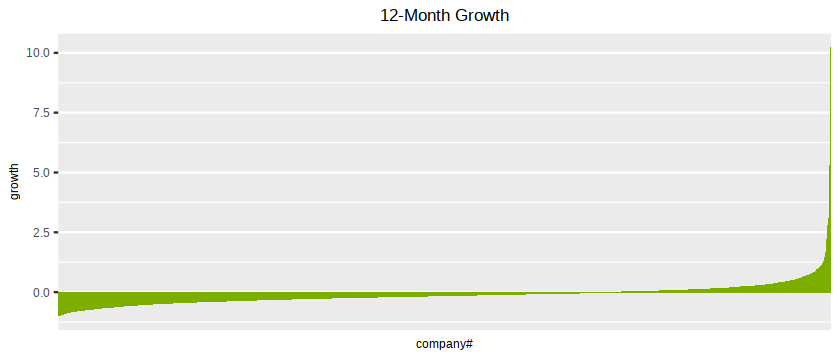

In [21]:
# Present a barchart to visualize growth across companies (sorted lowest to highest).
output_size(7,3)

ggplot(data) + xlab("company#") + ylab("growth") + ggtitle("12-Month Growth") + 
geom_col(aes(x=reorder(gvkey, growth), y=growth)) + scale_color_manual(values=PALETTE[3], drop=FALSE) + 
theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), panel.grid.major.x=element_blank())

output_size(restore)

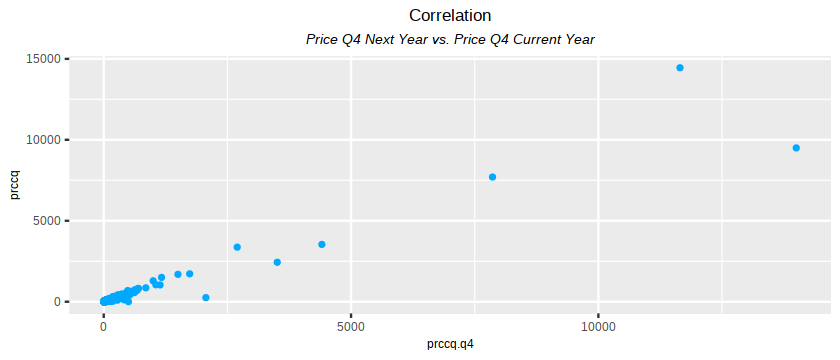

In [22]:
# Present a scatterplot to visualize correlation of price at Q4 next year vs. price at Q4 current year.
ggplot(data) + ggtitle("Correlation", subtitle="Price Q4 Next Year vs. Price Q4 Current Year") + 
    geom_point(aes(x=prccq.q4, y=prccq), color=PALETTE[1])

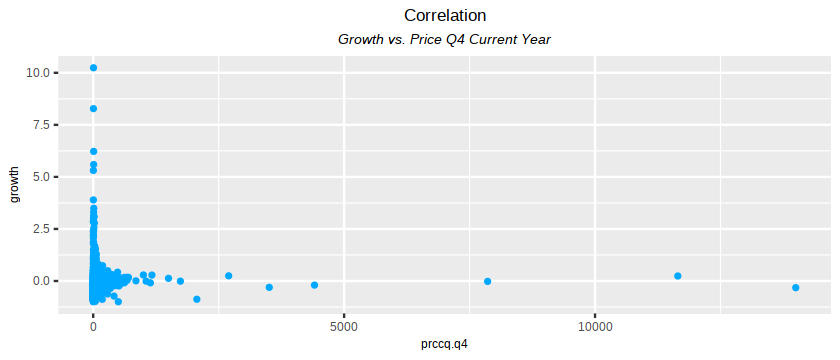

In [23]:
# Present a scatterplot to visualize correlation of growth vs. price at Q4 current year.
ggplot(data) + ggtitle("Correlation", subtitle="Growth vs. Price Q4 Current Year") + 
    geom_point(aes(x=prccq.q4, y=growth), color=PALETTE[1])

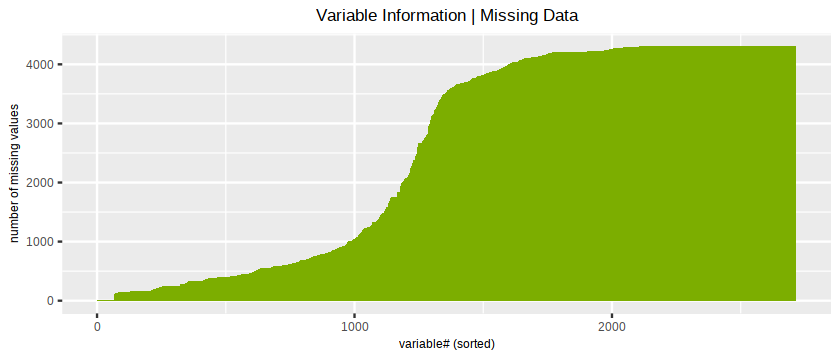

In [24]:
# Present a barchart to visualize the amount of missing data across variables
# (variables on the horizontal axis sorted by most complete to least complete,
#  number of missing values on the vertical axis).
#
# You can use the var_info.na_count() function. 
ggplot() + ggtitle("Variable Information | Missing Data") + xlab("variable# (sorted)") + 
ylab("number of missing values") + geom_col(aes(x=1:ncol(data), y=sort(var_info.na_count(data)))) + 
scale_color_manual(values=PALETTE[3], drop=FALSE)

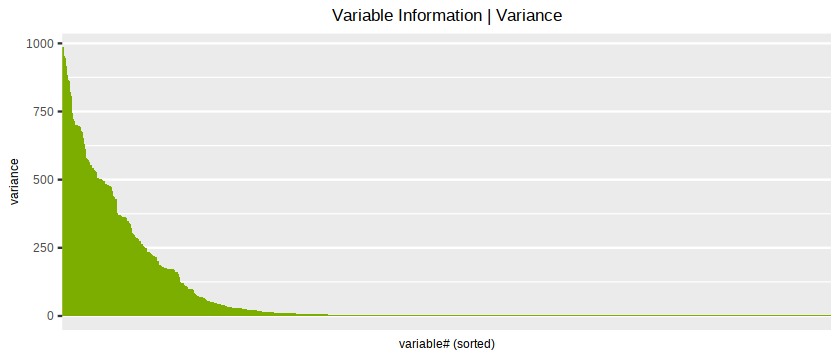

In [25]:
# Present a barchart to visualize of variance across variables
# (for numeric variables with variance≤1000 computed by excluding missing data,
#  sorted highest to lowest).
#
# You can use the var_info.var() function.

new.data = as.data.frame(var_info.var(data))
new.data = as.data.frame(new.data[(!(is.na(new.data[, 1]))) & (new.data[,1] <= 1000), ])
new.data$variances = new.data[, 1]
new.data$variable = 1:nrow(new.data)

ggplot(new.data) + xlab("variable# (sorted)") + ylab("variance") + ggtitle("Variable Information | Variance") + 
geom_col(aes(x=reorder(variable, -variances), y=variances)) + scale_color_manual(values=PALETTE[3], drop=FALSE) +
theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), panel.grid.major.x=element_blank())

In [33]:
# Present a 3D scatterplot projection to visualize revtq.q4 vs. prccq.q4 vs. growth
# (for revtq.q4≤1000, prccq.q4≤100, and -1≤growth≤5).
new.data = data[(data$revtq.q4 <= 1000) & (data$prccq.q4 <= 100) & (data$growth >= -1) & (data$growth <= 5),]
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(new.data[, c("revtq.q4", "prccq.q4", "growth")], type="s", col=PALETTE[1], size=1)
grid3d(c("x", "y", "z"))
rglwidget(elementId="myplot", width=400, height=400, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

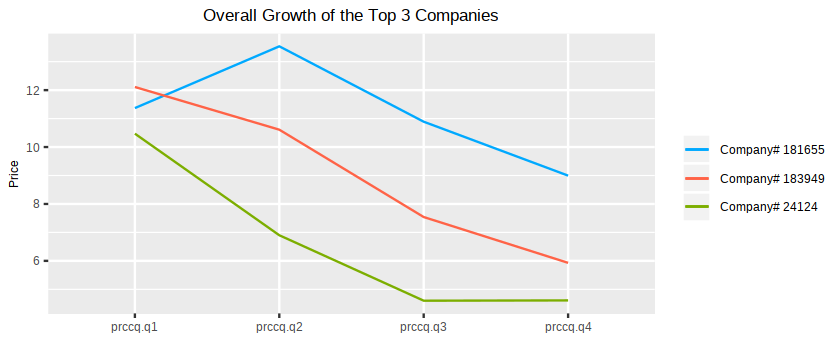

In [27]:
# Present some additional interesting data visualizations. 
# Line plot of top 3 companies in terms of growth
new.data = data[order(-data$growth),]
new.data = head(new.data, 3)
new.data = new.data[, c("gvkey", "prccq.q1", "prccq.q2", "prccq.q3", "prccq.q4")]
new.data = melt(new.data, id.vars="gvkey", measure.vars=c("prccq.q1", "prccq.q2", "prccq.q3", "prccq.q4"))

new.data = dcast(new.data, variable ~ gvkey, sum)
new.data$company.24124 = new.data[,2]
new.data$company.181655 = new.data[,3]
new.data$company.183949 = new.data[,4]

first.plot = geom_line(aes(x=variable, group=1, y=company.24124, color="Company# 24124"))
second.plot = geom_line(aes(x=variable, group=1, y=company.181655, color="Company# 181655"))
third.plot = geom_line(aes(x=variable, group=1, y=company.183949, color="Company# 183949"))

ggplot(new.data) + xlab("") + ylab("Price") + ggtitle("Overall Growth of the Top 3 Companies") + 
    first.plot + second.plot + third.plot + scale_color_manual(values=PALETTE)

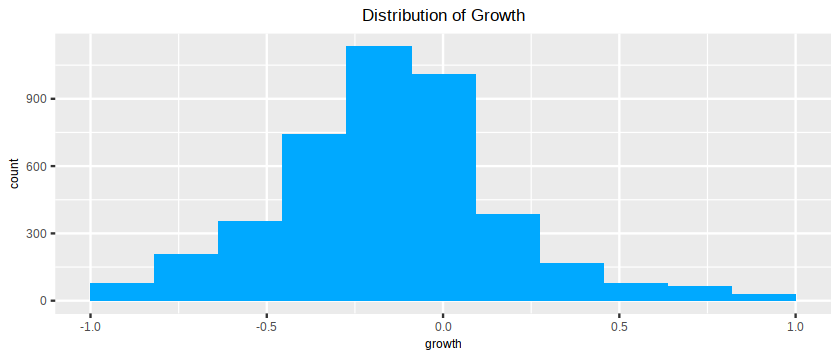

In [34]:
# Present some additional interesting data visualizations. 
ggplot(data) + ggtitle("Distribution of Growth") + xlim(-1,1) + 
    geom_histogram(aes(x=growth), bins=12, fill=PALETTE[1], na.rm=TRUE) + theme.legend_title

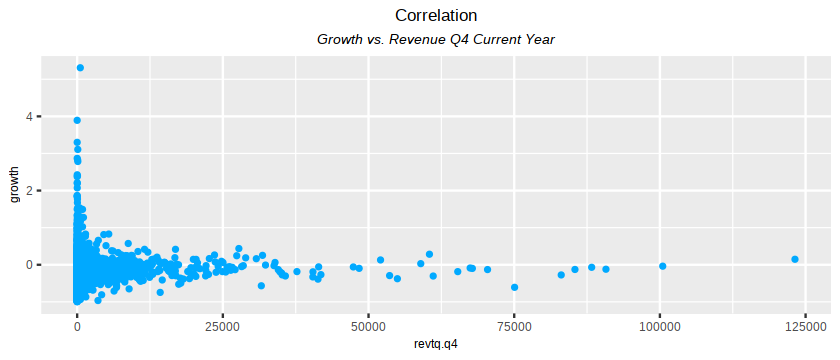

In [35]:
# Present some additional interesting data visualizations. 
new.data = data[!(is.na(data$revtq.q4)),]
ggplot(new.data) + ggtitle("Correlation", subtitle="Growth vs. Revenue Q4 Current Year") + 
geom_point(aes(x=revtq.q4, y=growth))

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised May 26, 2020
</span>
</p>
</font>